In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import cifar10

In [2]:
from utils import load_cifar10_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_cifar10_data()

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [3]:
import network, train, utils
from layers import ReluLayer, TernaryFullyConnectedLayer, \
    TernaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer

In [4]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10, 
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(TernaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(TernaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(TernaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(TernaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(TernaryConvolutionLayer(
    out_dim=512, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(TernaryConvolutionLayer(
    out_dim=512, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(TernaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(TernaryFullyConnectedLayer(out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
# Hyper-parameters
opt.set_rho(0.25)
opt.set_ema_rates(0.999)

In [ ]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []

sparsity_fracs = []

n_epochs = 500

for t in range(n_epochs):    
    print('Epoch: ', t)

    opt.train_epoch(batch_size=100, ema_decay=0.98, n_output=10, verbose=True)


    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    
    sparsity_fracs.append(utils.get_sparsity_frac(nn, opt))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)
sparsity_fracs = np.asarray(sparsity_fracs)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 2.185514, 0.08
Iter: 45 of 450 || Estimated train loss/acc: 1.763269, 0.17
Iter: 90 of 450 || Estimated train loss/acc: 1.530774, 0.29
Iter: 135 of 450 || Estimated train loss/acc: 1.489351, 0.32
Iter: 180 of 450 || Estimated train loss/acc: 1.476776, 0.22
Iter: 225 of 450 || Estimated train loss/acc: 1.407553, 0.25
Iter: 270 of 450 || Estimated train loss/acc: 1.330751, 0.33
Iter: 315 of 450 || Estimated train loss/acc: 1.280346, 0.23
Iter: 360 of 450 || Estimated train loss/acc: 1.164009, 0.33
Iter: 405 of 450 || Estimated train loss/acc: 1.026044, 0.35
Sparsity fraction (ratio of non-zero weights):  0.86653985013
Train loss/acc:  (1.0487055619557699, 0.25993333220481873) Test loss/acc:  (1.054015564918518

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9991492, 0.9991492, 0.9991492, 0.9991492, 0.9991492, 0.9991492, 0.9991492, 0.9991492, 0.9991492]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 0.095779, 0.88
Iter: 45 of 450 || Estimated train loss/acc: 0.095003, 0.84
Iter: 90 of 450 || Estimated train loss/acc: 0.061731, 0.92
Iter: 135 of 450 || Estimated train loss/acc: 0.073667, 0.89
Iter: 180 of 450 || Estimated train loss/acc: 0.056342, 0.92
Iter: 225 of 450 || Estimated train loss/acc: 0.054214, 0.95
Iter: 270 of 450 || Estimated train loss/acc: 0.061203, 0.94
Iter: 315 of 450 || Estimated train loss/acc: 0.081476, 0.88
Iter: 360 of 450 || Estimated train loss/acc: 0.082829, 0.88
Iter: 405 of 450 || Estimated train loss/acc: 0.092711, 0.88
Sparsity fraction (ratio of non-zero weights):  0.0818494116346
Train loss/acc:  (0.18607755740483603, 0.67142222245534267) Test loss/acc:  (0.21060839414596558, 0.6303999996

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99927616, 0.99927616, 0.99927616, 0.99927616, 0.99927616, 0.99927616, 0.99927616, 0.99927616, 0.99927616]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 0.023897, 0.98
Iter: 45 of 450 || Estimated train loss/acc: 0.030180, 0.97
Iter: 90 of 450 || Estimated train loss/acc: 0.021685, 0.98
Iter: 135 of 450 || Estimated train loss/acc: 0.023616, 0.97
Iter: 180 of 450 || Estimated train loss/acc: 0.013639, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.023015, 0.98
Iter: 270 of 450 || Estimated train loss/acc: 0.037142, 0.95
Iter: 315 of 450 || Estimated train loss/acc: 0.015709, 0.99
Iter: 360 of 450 || Estimated train loss/acc: 0.024261, 0.98
Iter: 405 of 450 || Estimated train loss/acc: 0.054330, 0.93
Sparsity fraction (ratio of non-zero weights):  0.100533253845
Train loss/acc:  (0.05806496096981896, 0.91502222749922013) Test loss/acc:  (0.12391566842794419, 0.79

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99938422, 0.99938422, 0.99938422, 0.99938422, 0.99938422, 0.99938422, 0.99938422, 0.99938422, 0.99938422]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 0.013520, 0.99
Iter: 45 of 450 || Estimated train loss/acc: 0.018849, 0.98
Iter: 90 of 450 || Estimated train loss/acc: 0.005033, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.010374, 0.99
Iter: 180 of 450 || Estimated train loss/acc: 0.002493, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.022601, 0.97
Iter: 270 of 450 || Estimated train loss/acc: 0.012406, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.028634, 0.97
Iter: 360 of 450 || Estimated train loss/acc: 0.031286, 0.97
Iter: 405 of 450 || Estimated train loss/acc: 0.029178, 0.96
Sparsity fraction (ratio of non-zero weights):  0.114427120264
Train loss/acc:  (0.066314009063773688, 0.89493332703908279) Test loss/acc:  (0.14940252006053925, 0.7

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99947608, 0.99947608, 0.99947608, 0.99947608, 0.99947608, 0.99947608, 0.99947608, 0.99947608, 0.99947608]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 0.003824, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.009753, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.003500, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.017965, 0.99
Iter: 180 of 450 || Estimated train loss/acc: 0.005685, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.016483, 0.98
Iter: 270 of 450 || Estimated train loss/acc: 0.007077, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.010490, 0.99
Iter: 360 of 450 || Estimated train loss/acc: 0.011679, 0.99
Iter: 405 of 450 || Estimated train loss/acc: 0.017341, 0.98
Sparsity fraction (ratio of non-zero weights):  0.118082789416
Train loss/acc:  (0.057745295729902058, 0.90917778068118626) Test loss/acc:  (0.15464711844921111, 0.7

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99955428, 0.99955428, 0.99955428, 0.99955428, 0.99955428, 0.99955428, 0.99955428, 0.99955428, 0.99955428]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 0.002984, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.001142, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.005725, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.007303, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.009546, 0.99
Iter: 225 of 450 || Estimated train loss/acc: 0.001470, 1.00
Iter: 270 of 450 || Estimated train loss/acc: 0.005081, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.001859, 1.00
Iter: 360 of 450 || Estimated train loss/acc: 0.007992, 1.00
Iter: 405 of 450 || Estimated train loss/acc: 0.003973, 1.00
Sparsity fraction (ratio of non-zero weights):  0.115592076133
Train loss/acc:  (0.03024781902631124, 0.9565555432107713) Test loss/acc:  (0.13848123371601104, 0.804

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99962085, 0.99962085, 0.99962085, 0.99962085, 0.99962085, 0.99962085, 0.99962085, 0.99962085, 0.99962085]
rho:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Iter: 0 of 450 || Estimated train loss/acc: 0.005369, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.007039, 0.99
Iter: 90 of 450 || Estimated train loss/acc: 0.006525, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.008316, 0.99
Iter: 180 of 450 || Estimated train loss/acc: 0.002607, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.006516, 0.99
Iter: 270 of 450 || Estimated train loss/acc: 0.002723, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.011644, 1.00
Iter: 360 of 450 || Estimated train loss/acc: 0.015487, 0.99
Iter: 405 of 450 || Estimated train loss/acc: 0.003241, 1.00
Sparsity fraction (ratio of non-zero weights):  0.110037722788
Train loss/acc:  (0.020162395321660573, 0.97284445338779024) Test loss/acc:  (0.13102664947509765, 0.8

In [17]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (1.487573415322648e-06, 1.0)
Valid:  (0.24831801891326905, 0.86840000152587893)
Test:  (0.26798239350318909, 0.8642000031471252)


In [33]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  141
Train acc:  1.0
Valid acc:  0.876199998856
Test acc:  0.866100001335


Final results:  [  1.36232333e-06   1.00000000e+00   2.49434514e-01   8.67000003e-01
   2.66178123e-01   8.64200006e-01]


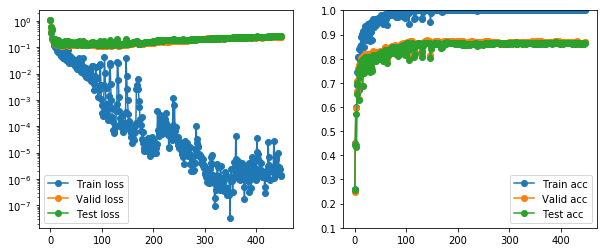

In [34]:
# Save data
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])

Final sparsity fraction:  0.0129810895673


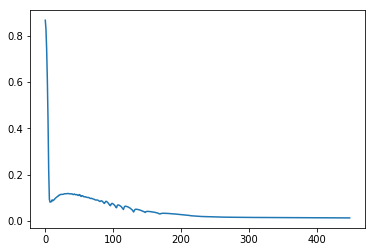

In [35]:
# plot sparsity fracs
plt.plot(sparsity_fracs)
print('Final sparsity fraction: ', sparsity_fracs[-1])